### Классификация цифр с помощью нейросети


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from keras.engine.training import optimizer

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

x_train = np.expand_dims(x_train, axis = 3)
x_test = np.expand_dims(x_test, axis = 3)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

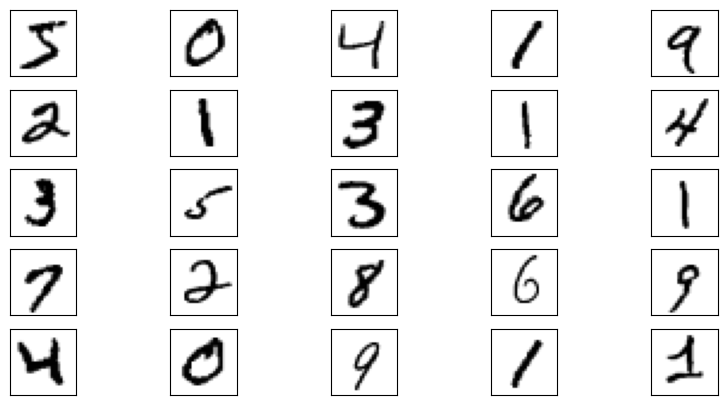

In [ ]:
plt.figure(figsize = (10,5))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.yticks([])#deletes axis legend
    plt.xticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)

plt.show()

### Строим нейросеть


In [ ]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding = 'same',activation = 'relu',input_shape = (28, 28, 1)),
    MaxPooling2D((2,2), strides = 2),
    Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    MaxPooling2D((2,2), strides = 2),
    Flatten(),
    Dense(128, activation = 'relu'),  #building model
    Dense(10, activation = 'softmax')
])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
#customed optimizers
myAdam = keras.optimizers.Adam(learning_rate = 0.1)
myOpt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.5, nesterov = True)

In [ ]:
model.compile(optimizer = myOpt,
              loss = 'categorical_crossentropy',#because it's cool
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_split = 0.2)#model training

Epoch 1/5
1500/1500 [==============================] - 72s 48ms/step - loss: 1.5215 - accuracy: 0.6168 - val_loss: 0.4896 - val_accuracy: 0.8712
Epoch 2/5
1500/1500 [==============================] - 73s 49ms/step - loss: 0.3919 - accuracy: 0.8870 - val_loss: 0.2936 - val_accuracy: 0.9171
Epoch 3/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2778 - accuracy: 0.9180 - val_loss: 0.2331 - val_accuracy: 0.9325
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.2275 - accuracy: 0.9321 - val_loss: 0.2036 - val_accuracy: 0.9411
Epoch 5/5
1500/1500 [==============================] - 67s 45ms/step - loss: 0.1955 - accuracy: 0.9419 - val_loss: 0.1853 - val_accuracy: 0.9442


In [ ]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 4s 11ms/step - loss: 0.1750 - accuracy: 0.9457


[0.17495594918727875, 0.9456999897956848]

1/1 [==============================] - 0s 102ms/step
Распознанная цифра: 7


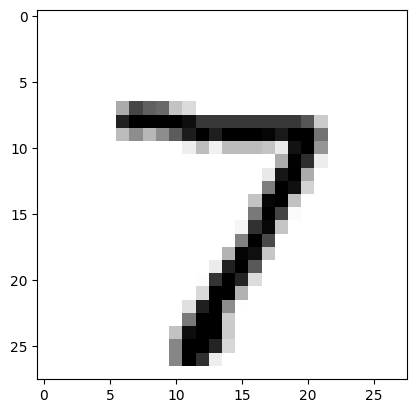

In [ ]:
n = 0
x = np.expand_dims(x_test[n], axis = 0)#adding extra axis to a tensor (to make it 3D for the next line input)
res = model.predict(x)
print(f"Распознанная цифра: {np.argmax(res)}")

plt.imshow(x_test[n], cmap = plt.cm.binary)
plt.show()

Пример работы softmax:

In [ ]:
print(res)

[[0.00000e+00 0.00000e+00 0.00000e+00 8.59445e-35 0.00000e+00 0.00000e+00
  0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00]]


In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)

print(pred.shape)

313/313 [==============================] - 1s 2ms/step
(10000,)


Сравнение предсказания и тестовой выборки:

In [ ]:
print(pred[:20])
print(y_test[:20])

[7 2 1 0 4 1 4 9 9 9 0 6 9 0 1 9 9 7 9 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
mask = pred == y_test


In [ ]:
x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

(3559, 28, 28)


Неверно определенные цифры:

Значение сети: 9


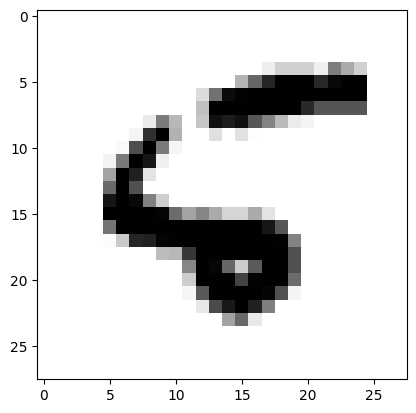

Значение сети: 9


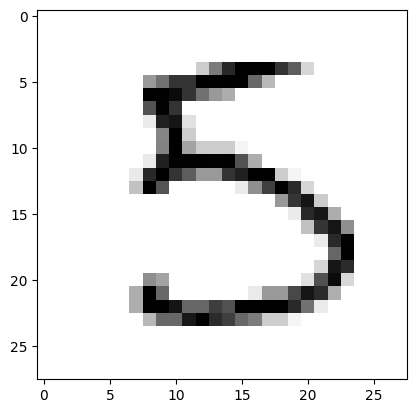

Значение сети: 9


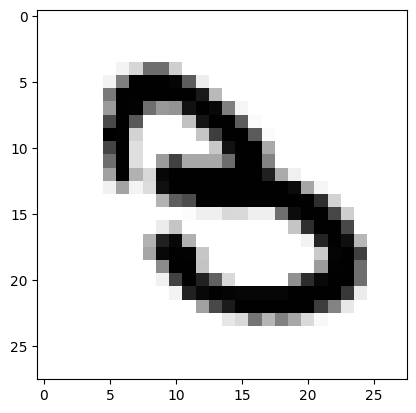

Значение сети: 9


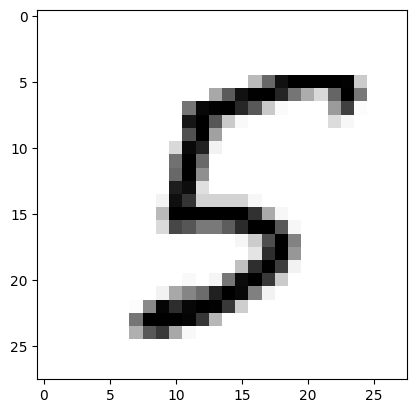

Значение сети: 9


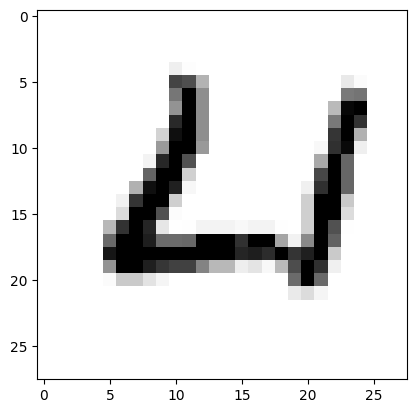

In [ ]:
for i in range(5):
    print("Значение сети: " + str(p_false[i]))
    plt.imshow(x_false[i], cmap = plt.cm.binary)
    plt.show()